In [1]:
%pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
df = pd.read_csv("college-data.csv")

print(df.shape)
print(df.head())

x = df.drop("CollegeTier", axis=1).values   # convert to NumPy array
y = df["CollegeTier"].values

print("Features shape:", x.shape)
print("Target shape:", y.shape)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=42, stratify=y
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Processed training set shape:", x_train.shape)



(9, 7)
   GPA   SAT  #ofHonorsClasses  #ofVarsitySports  #ofLeadershipPositions  \
0  9.6  1590                12                 1                       2   
1  8.4  1600                10                 1                       1   
2  7.4  1470                 8                 2                       1   
3  3.8  1200                 0                 2                       0   
4  6.2  1300                 4                 0                       0   

   #ofAwards  CollegeTier  
0          6            1  
1          1            1  
2          1            2  
3          0            3  
4          0            3  
Features shape: (9, 6)
Target shape: (9,)
Processed training set shape: (4, 6)


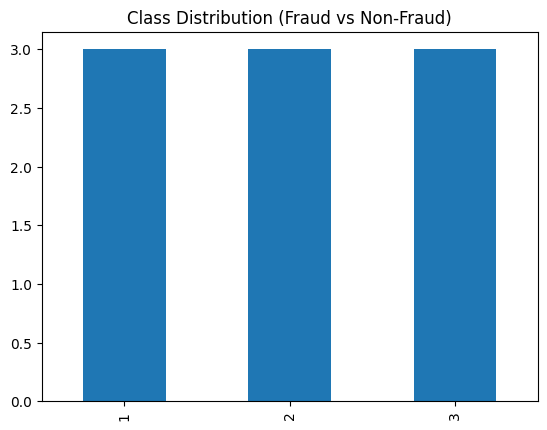

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.Series(y).value_counts().plot(kind="bar")
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

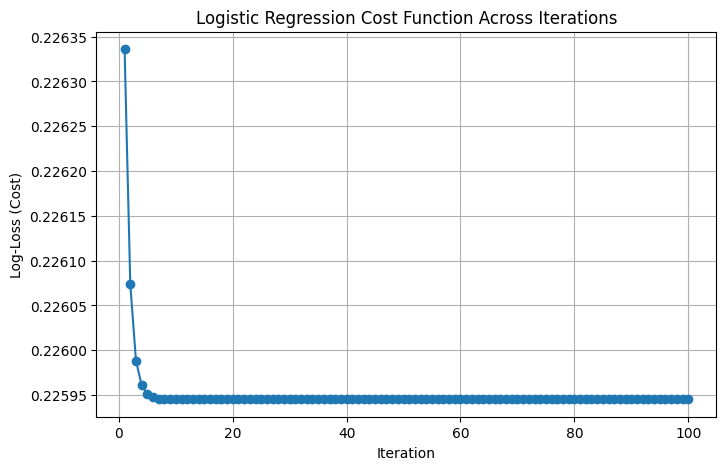

In [25]:
model = LogisticRegression(
    max_iter=100000,  
    warm_start=True,  
    solver='saga', 
    random_state=42
)

max_iterations = 100
losses = []

for i in range(max_iterations):
    model.fit(x_train, y_train)           
    y_prob = model.predict_proba(x_train) 
    loss = log_loss(y_train, y_prob)
    losses.append(loss)
    model.max_iter += 1 

plt.figure(figsize=(8,5))
plt.plot(range(1, max_iterations+1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log-Loss (Cost)')
plt.title('Logistic Regression Cost Function Across Iterations')
plt.grid(True)
plt.show()

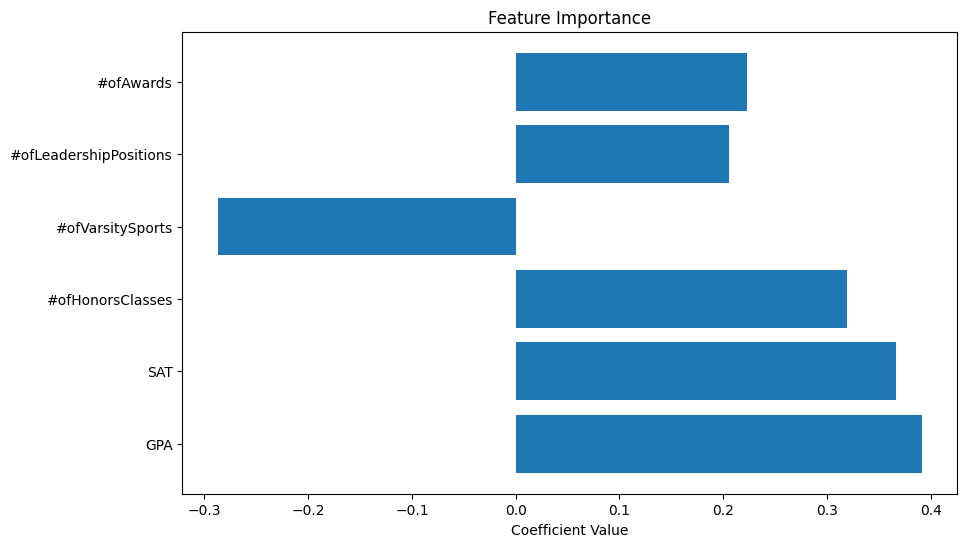

In [26]:
coefficients = model.coef_[0]
features = df.drop('CollegeTier', axis=1).columns

# Feature Importance
plt.figure(figsize=(10,6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

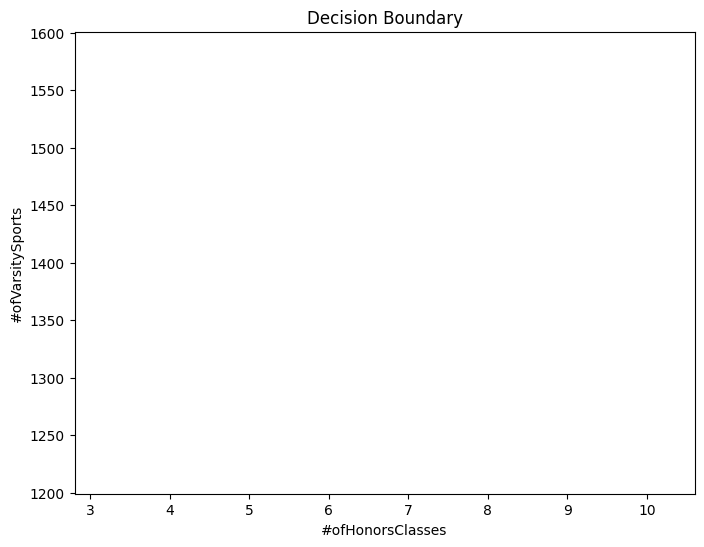

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x1 = "#ofHonorsClasses"
x2 = "#ofVarsitySports"
y1 = "CollegeTier"

x_data = df[[x1, x2]].values
y_data = df[y1].values


x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1  # add padding
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

plt.figure(figsize=(8,6))
colors = ['red' if label == 2 else 'green' for label in y_data]
plt.scatter(x_data[:,0], x_data[:,1], c=colors, marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(x1)
plt.ylabel(x2)
plt.title('Decision Boundary')
plt.show()

In [37]:
test = [
    [6.8, 1440, 10, 2, 3, 4]
]

test = scaler.transform(test)
prediction = model.predict(test)
probabilities = model.predict_proba(test)
print("Predicted College Tier:", prediction)
print("Prediction Probabilities:", probabilities)

Predicted College Tier: [1]
Prediction Probabilities: [[0.52435226 0.45562456 0.02002318]]
